In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import pandas_datareader.data as web
from talib import abstract
import talib
import mpl_finance as mpf

df = web.DataReader("^TWII", "yahoo", datetime(2018,4,1))
df.columns = ['high', 'low', 'open', 'close', 'volume', 'adj close']

Text(0.5,1,'BBands')

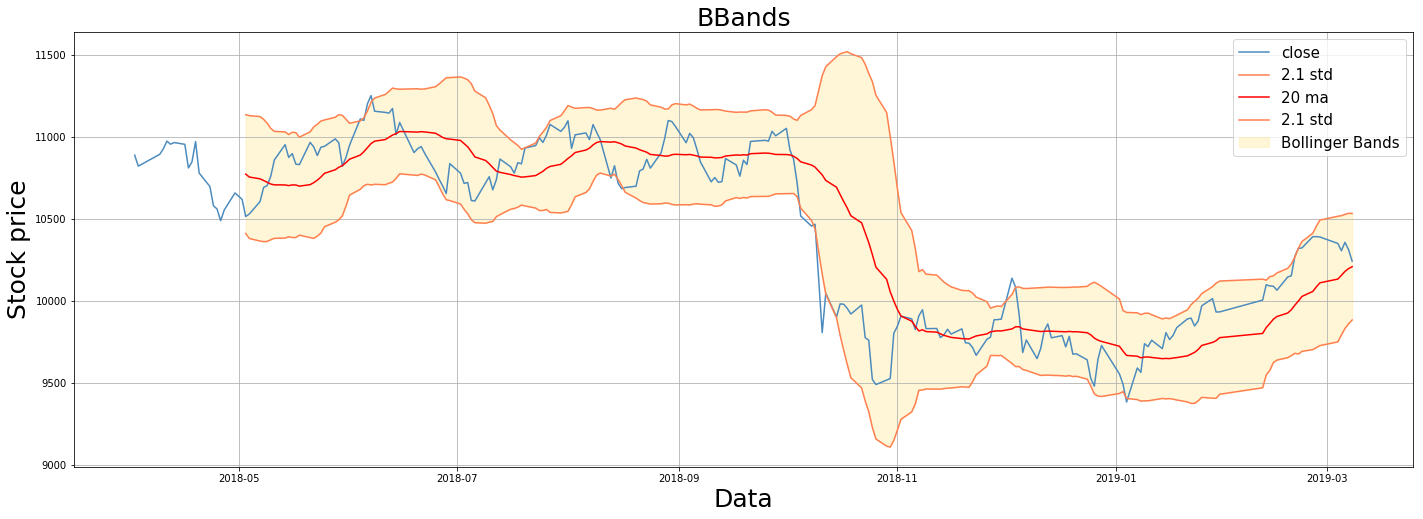

In [2]:
nbdevup = 2.1
nbdevdn = 2.1
timeperiod = 20

# bbands策略,N=20
df['%sma'%timeperiod] = pd.Series.rolling(df['adj close'], window=timeperiod).mean()
df['std'] = pd.Series.rolling(df['adj close'], window=timeperiod).std()
# 上軌=20ma+1.5sd ,中軌=20ma, 下軌=20ma-1.5sd
df['ubb'] = df['%sma'%timeperiod] + nbdevup*df['std']
df['mbb'] = df['%sma'%timeperiod]
df['lbb'] = df['%sma'%timeperiod] - nbdevdn*df['std']
# df[['adj close','ubb','mbb', 'lbb']].plot(grid=True, figsize=(20,10))
fig = plt.figure(figsize=(24,8))
plt.grid(True)
plt.plot(df[['adj close']], color="#4B8BBE", label="close")
plt.plot(df[['ubb']], color="coral", label="%s std"%nbdevup)
plt.plot(df[['mbb']], color="red", label='%s ma'%timeperiod)
plt.plot(df[['lbb']], color="coral", label="%s std"%nbdevdn)
plt.fill_between(df[['mbb']].index, np.squeeze(df[['lbb']]), np.squeeze(df[['ubb']]), alpha=0.2, label='Bollinger Bands', color="#FFD43B")
plt.legend(prop={'size':15})
plt.xlabel('Data', size=25) 
plt.ylabel('Stock price', size=25) 
plt.title("BBands", size=25)

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


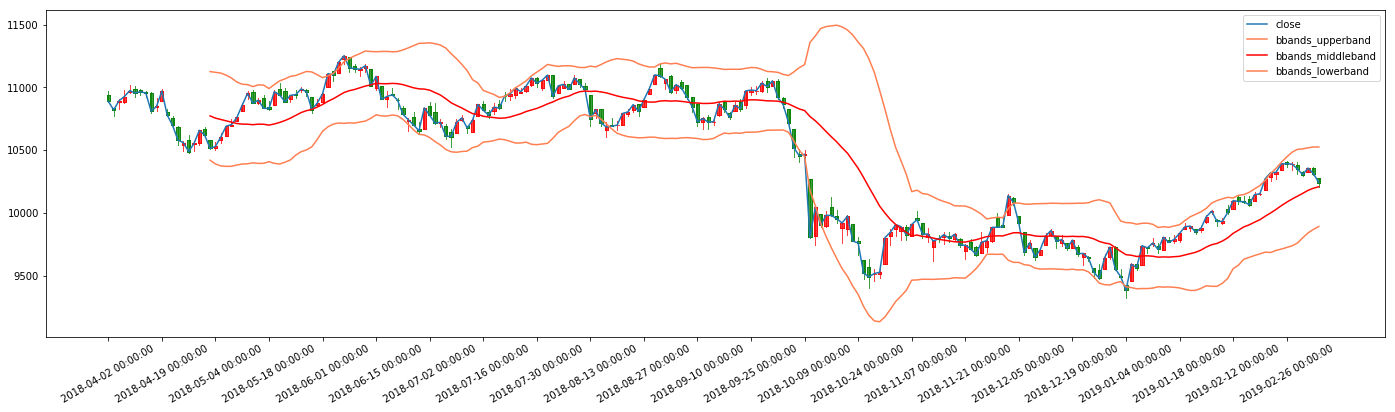

In [3]:
close = np.array(df[['adj close']])
# sma = talib.SMA(np.array(df['close']), 20)
bbands_upperband = np.array(abstract.BBANDS(df, 20, 2.1, 2.1)["upperband"])
bbands_middleband = np.array(abstract.BBANDS(df, 20, 2.1, 2.1)["middleband"])
bbands_lowerband = np.array(abstract.BBANDS(df, 20, 2.1, 2.1)["lowerband"])
fig = plt.figure(figsize=(24, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks(range(0, len(df.index), 10))
ax.set_xticklabels(df.index[::10])
mpf.candlestick2_ochl(ax, df['open'], df['close'], df['high'], df['low'], width=0.6, colorup='r', colordown='g', alpha=0.75)
plt.rcParams['font.sans-serif']=['‪kaiu'] 
plt.xticks(rotation=30)
ax.plot(close, label='close')
# ax.plot(sma, label='20MA')
ax.plot(bbands_upperband, label='bbands_upperband', color="coral")
ax.plot(bbands_middleband, label='bbands_middleband', color="red")
ax.plot(bbands_lowerband, label='bbands_lowerband', color="coral")
ax.legend()